In [2]:
#pacman rpackage, your first line can be condensed for an rpackage and will automatically install if package is missing. 

library(readxl)
library(doBy)
library(knitr)
library(magrittr)
library(ggplot2)
library(gridExtra)
library(dplyr)
library(alr4)
library(effects)
library(GGally)
library(lsmeans)
library(MASS)
library(Rlab)
library(BlandAltmanLeh)
library(psych)
library(plyr)
library(biomaRt)
library(Biobase)
library(reshape2)
library(tidyverse)
library(mosaic)
library(ggpmisc)
library(cowplot)
library(ggpubr)
library(stargazer)
library(ggridges)
options(width = 100)


### loading in data

In [3]:

###file locations for github

final_pt_df2 <- read.csv('/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling/data/raw/csv/16082018_final_pt_df2.csv', stringsAsFactors=FALSE, fileEncoding="latin1")

#labs_all48<- read.csv('/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling/data/wrangled/labs_all48_df.csv', stringsAsFactors=FALSE, fileEncoding="latin1")

vaso_dose_72<- read.csv('/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling/data/raw/csv/72_hr_window/27082018_vaso_dose_72.csv', stringsAsFactors=FALSE, fileEncoding="latin1")

labs_all_nosummary_72<- read.csv('/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling/data/raw/csv/72_hr_window/27082018_labs_all_nosummary_72.csv', stringsAsFactors=FALSE, fileEncoding="latin1")


### example code

In [ ]:
#example dplyr code to make dataset

mu <- wdata %>% 
  group_by(sex) %>%
  summarise(grp.mean = mean(weight))
mu

In [ ]:
#####example density plotting code#####
# y axis scale = ..density.. (default behaviour)
a + geom_density() +
  geom_vline(aes(xintercept = mean(weight)), 
             linetype = "dashed", size = 0.6)
  
# Change y axis to count instead of density
a + geom_density(aes(y = ..count..), fill = "lightgray") +
  geom_vline(aes(xintercept = mean(weight)), 
             linetype = "dashed", size = 0.6,
             color = "#FC4E07")

### playing around

In [6]:
head(labs_all_nosummary_72)

X,subject_id,hadm_id,icustay_id,charttime,label,valuenum,t_0,delta
0,9,150750,220597,2149-11-14 07:47:00,SODIUM,137.0,2149-11-13,1 days 07:47:00.000000000
81,9,150750,220597,2149-11-13 03:20:00,ALBUMIN,3.0,2149-11-13,0 days 03:20:00.000000000
82,9,150750,220597,2149-11-13 03:20:00,ANION GAP,13.0,2149-11-13,0 days 03:20:00.000000000
83,9,150750,220597,2149-11-13 03:20:00,BICARBONATE,22.0,2149-11-13,0 days 03:20:00.000000000
84,9,150750,220597,2149-11-13 03:20:00,CHLORIDE,99.0,2149-11-13,0 days 03:20:00.000000000
85,9,150750,220597,2149-11-13 03:20:00,CREATININE,1.6,2149-11-13,0 days 03:20:00.000000000


In [38]:
mu <- labs_all_nosummary_72[,c('label','valuenum')] %>% 
  group_by(label) %>%
  dplyr::summarise(lab_mean = mean(valuenum))
mu

label,lab_mean
ALBUMIN,2.852343
ANION GAP,14.215344
BANDS,9.980112
BICARBONATE,23.681667
BILIRUBIN,2.951136
BUN,31.524805
CHLORIDE,105.234058
CREATININE,1.722229
GLUCOSE,137.447581
HEMATOCRIT,30.432652


In [45]:
grp<- group_by(labs_all_nosummary_72[,c('label','valuenum')])
grp


label,valuenum
SODIUM,137.0
ALBUMIN,3.0
ANION GAP,13.0
BICARBONATE,22.0
CHLORIDE,99.0
CREATININE,1.6
GLUCOSE,170.0
POTASSIUM,3.8
SODIUM,130.0
BUN,23.0


In [49]:
a <- ggplot(labs_all_nosummary_72[,c('label','valuenum')], aes(x=valuenum))

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”

ERROR: Error in as(xintercept = mean(valuenum)): unused argument (xintercept = mean(valuenum))


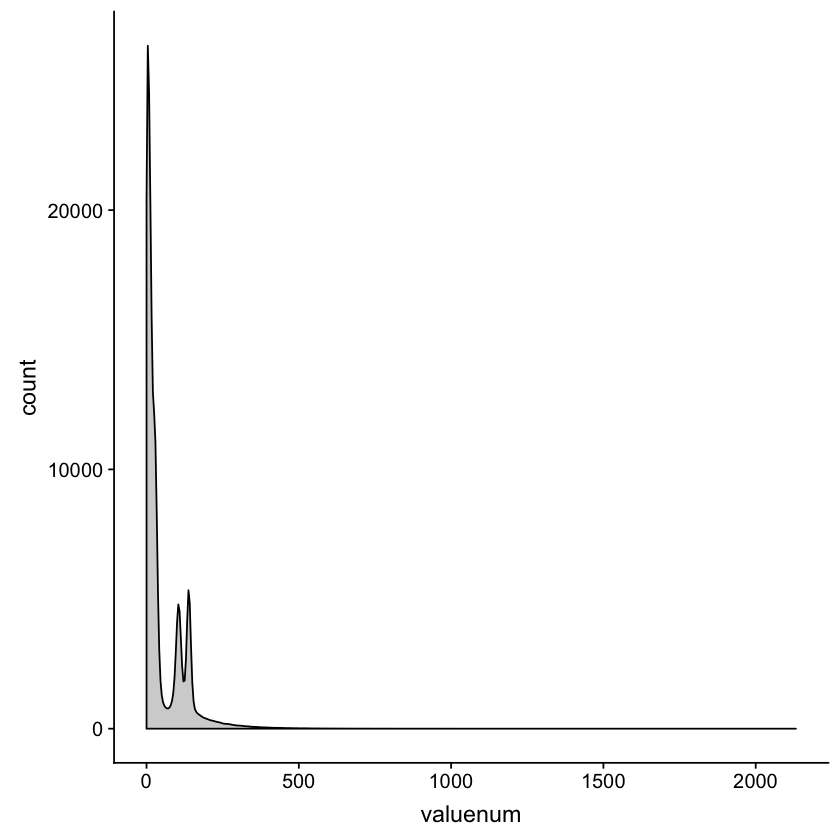

In [48]:
a + geom_density(aes(y=..count..)) 
    + geom_vline(as(xintercept = mean(valuenum)),
                linetype= 'dashed', size=0.6,
                color='red')

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”

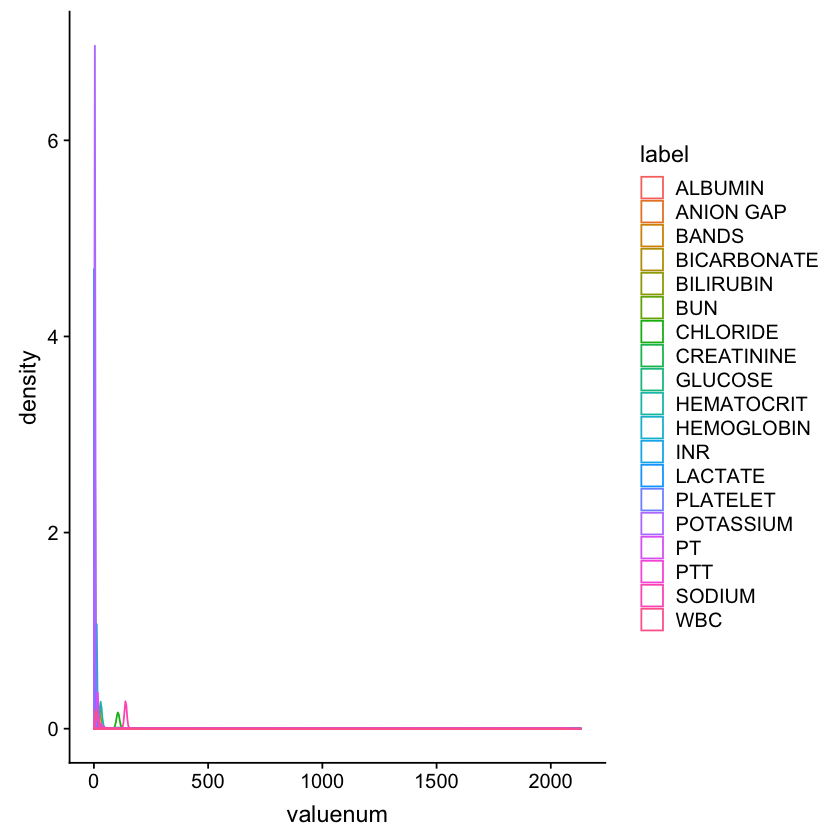

In [52]:
a + geom_density(aes(color=label))

In [70]:
b <- ggplot(labs_all_nosummary_72[,c('label','valuenum')], aes(x=valuenum, y= label))

ERROR: Error in b <- ggplot(labs_all_nosummary_72[, c("label", "valuenum")], : could not find function "<-<-"


Picking joint bandwidth of 1.24
Warning message:
“Removed 1 rows containing non-finite values (stat_density_ridges).”

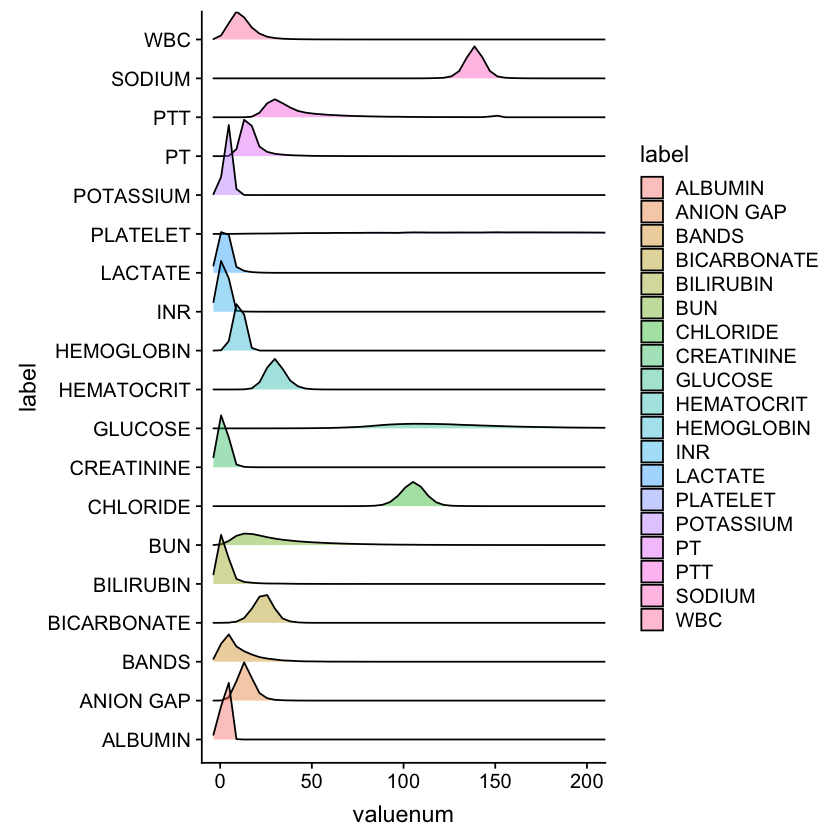

In [75]:
b + geom_density_ridges(aes(fill=label), alpha=0.4) + coord_cartesian(xlim=c(0,200))

Picking joint bandwidth of 1.24
Warning message:
“Removed 1 rows containing non-finite values (stat_density_ridges).”

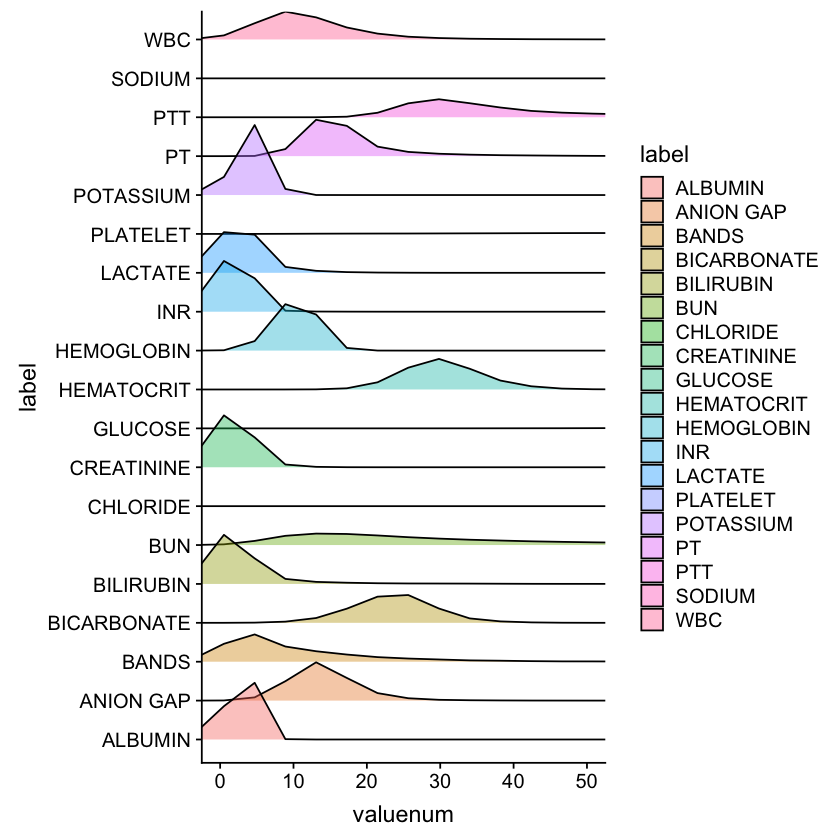

In [76]:
b + geom_density_ridges(aes(fill=label), alpha=0.4) + coord_cartesian(xlim=c(0,50))

In [60]:
library(ggridges)

In [ ]:
a + geom_density(aes(y=..count..)) + geom_vline(as(xintercept = mean(valuenum)),
                linetype= 'dashed', size=0.6,
                color='red')

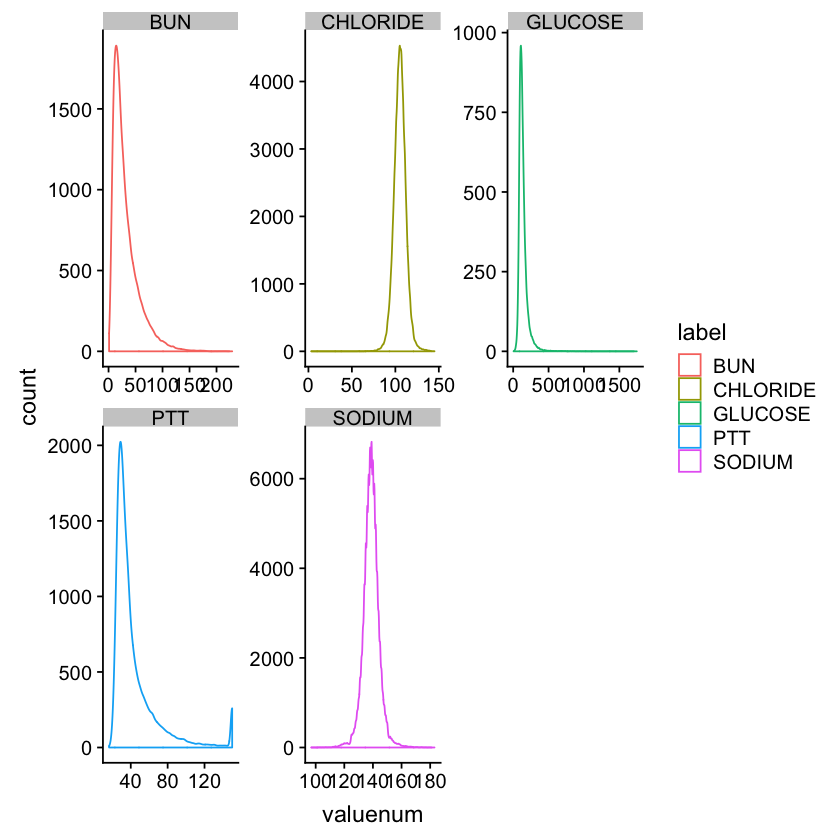

In [111]:
df<-subset(labs_all_nosummary_72[,c('label','valuenum')], label %in% c('BUN','CHLORIDE','GLUCOSE','PTT','SODIUM'))
a<- ggplot(df, aes(x=valuenum)) #+ geom_density()
a + facet_wrap(~ label, ncol = 3, scales = "free") + geom_density(aes(y = ..count.., color= label)) #+ coord_cartesian(xlim=c(0,250))

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”

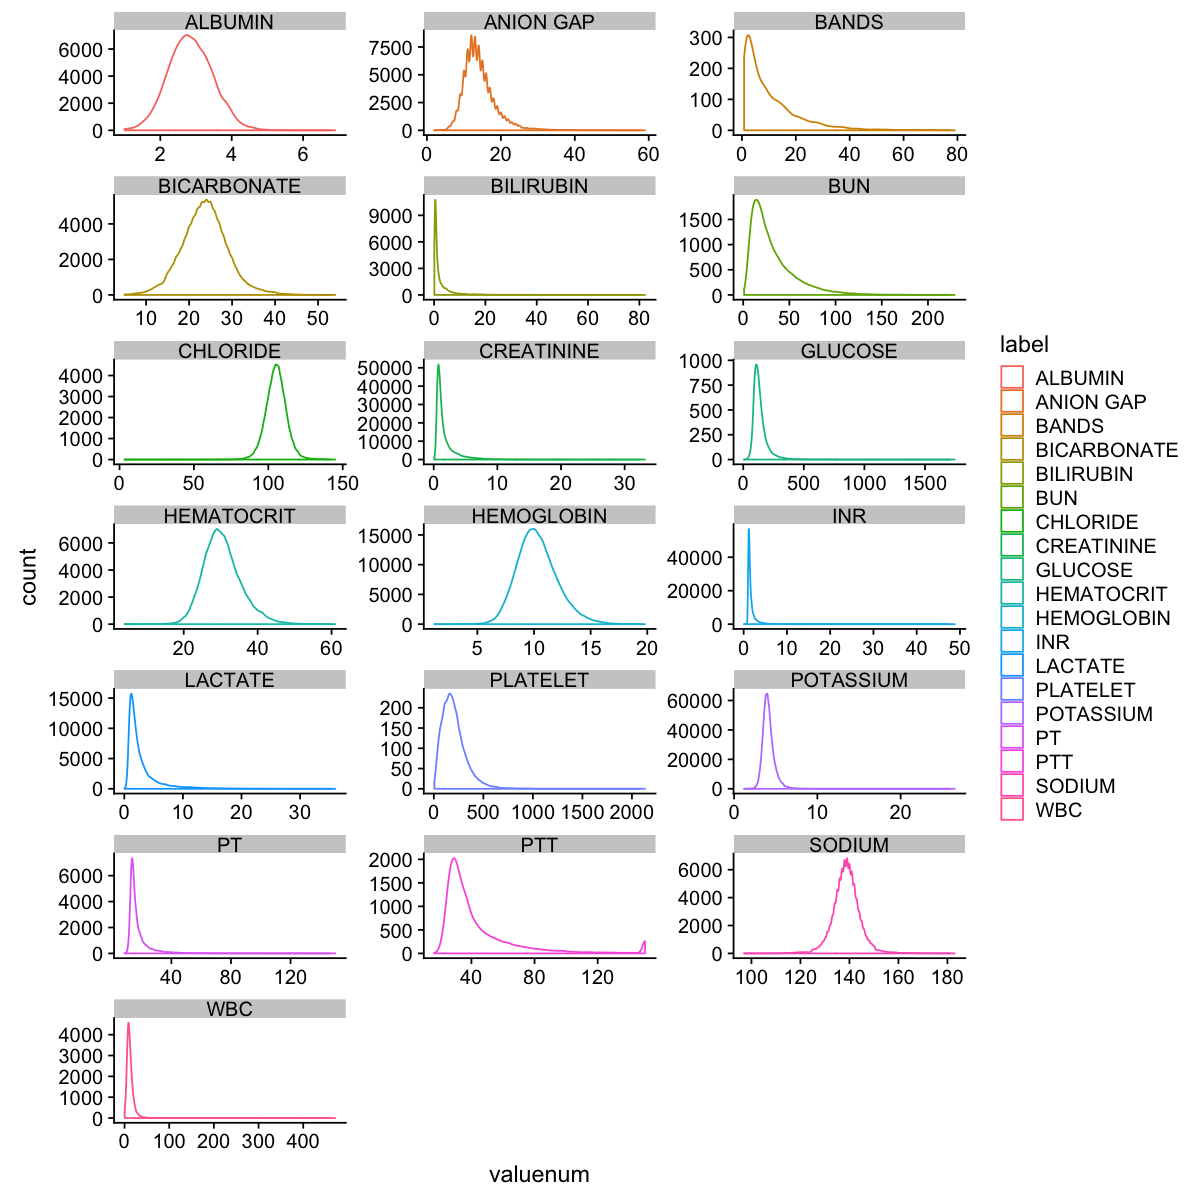

In [124]:
options(repr.plot.width=10, repr.plot.height=10)
df<-subset(labs_all_nosummary_72[,c('label','valuenum')])
a<- ggplot(df, aes(x=valuenum)) #+ geom_density()
a + facet_wrap(~ label, ncol = 3, scales = "free") + geom_density(aes(y = ..count.., color= label))

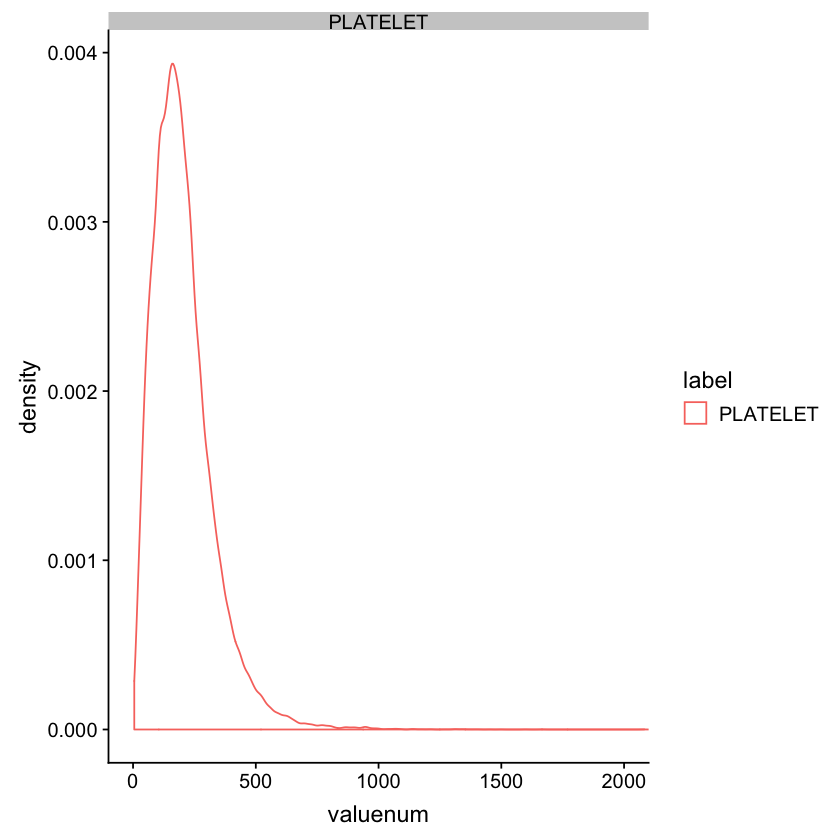

In [90]:
#a different view of the same data using facet wrap
df<-subset(labs_all_nosummary_72[,c('label','valuenum')], label== 'PLATELET')
a<- ggplot(df, aes(x=valuenum)) #+ geom_density()
a + facet_wrap(~ label, ncol = 3, scales = "free_y") + geom_density(aes(color = label)) + coord_cartesian(xlim=c(0,2000))

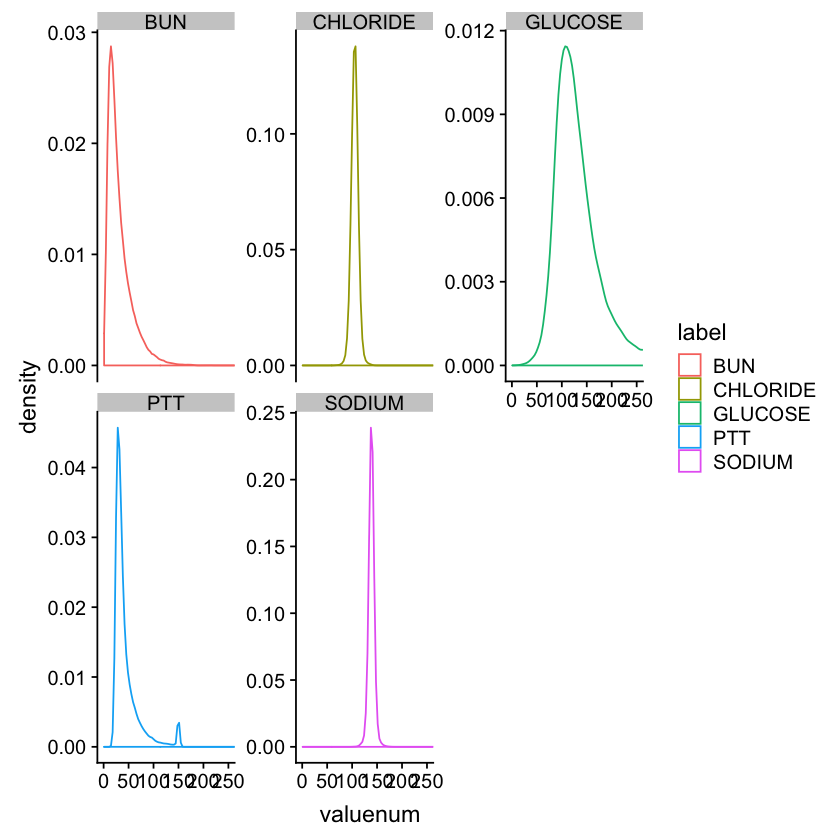

In [101]:
df<-subset(labs_all_nosummary_72[,c('label','valuenum')], label %in% c('BUN','CHLORIDE','GLUCOSE','PTT','SODIUM'))
a<- ggplot(df, aes(x=valuenum)) #+ geom_density()
a + facet_wrap(~ label, ncol = 3, scales = "free_y") + geom_density(aes(color = label)) + coord_cartesian(xlim=c(0,250))

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”

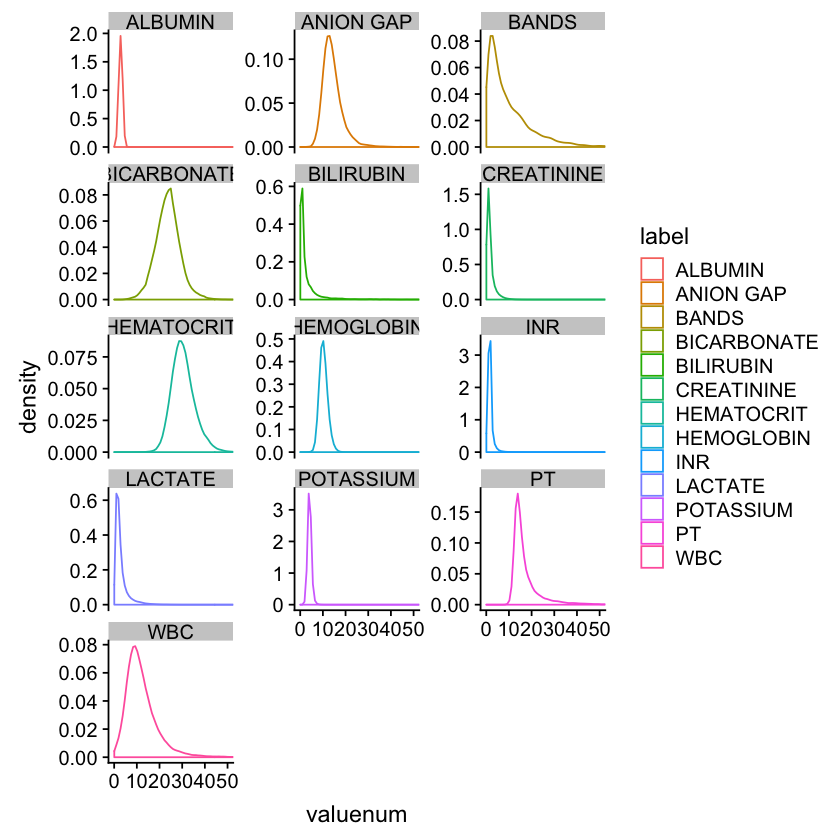

In [100]:
df<-subset(labs_all_nosummary_72[,c('label','valuenum')], !(label %in% c('BUN','CHLORIDE','GLUCOSE','PTT','SODIUM','PLATELET')))
a<- ggplot(df, aes(x=valuenum)) #+ geom_density()
a + facet_wrap(~ label, ncol = 3, scales = "free_y") + geom_density(aes(color = label)) + coord_cartesian(xlim=c(0,50))

### % MISSINGNESS
need to look for the amount of patients who are missing any value in any of the categories

In [103]:
unique(labs_all_nosummary_72)

X,subject_id,hadm_id,icustay_id,charttime,label,valuenum,t_0,delta
0,9,150750,220597,2149-11-14 07:47:00,SODIUM,137.0,2149-11-13,1 days 07:47:00.000000000
81,9,150750,220597,2149-11-13 03:20:00,ALBUMIN,3.0,2149-11-13,0 days 03:20:00.000000000
82,9,150750,220597,2149-11-13 03:20:00,ANION GAP,13.0,2149-11-13,0 days 03:20:00.000000000
83,9,150750,220597,2149-11-13 03:20:00,BICARBONATE,22.0,2149-11-13,0 days 03:20:00.000000000
84,9,150750,220597,2149-11-13 03:20:00,CHLORIDE,99.0,2149-11-13,0 days 03:20:00.000000000
85,9,150750,220597,2149-11-13 03:20:00,CREATININE,1.6,2149-11-13,0 days 03:20:00.000000000
86,9,150750,220597,2149-11-13 03:20:00,GLUCOSE,170.0,2149-11-13,0 days 03:20:00.000000000
87,9,150750,220597,2149-11-13 03:20:00,POTASSIUM,3.8,2149-11-13,0 days 03:20:00.000000000
88,9,150750,220597,2149-11-13 03:20:00,SODIUM,130.0,2149-11-13,0 days 03:20:00.000000000
89,9,150750,220597,2149-11-13 03:20:00,BUN,23.0,2149-11-13,0 days 03:20:00.000000000


In [ ]:
aggregate(data.frame(count = v), list(value = v), length)

In [ ]:
group_by(labs_all_nosummary_72[,c('label','valuenum')])

In [105]:
aggregate(labs_all_nosummary_72, by= hadm_id, )

ERROR: Error in match.fun(FUN): argument "FUN" is missing, with no default


In [106]:
?aggregate

aggregate {stats},R Documentation
x,an R object.
by,"a list of grouping elements, each as long as the variables in the data frame x. The elements are coerced to factors before use."
FUN,a function to compute the summary statistics which can be applied to all data subsets.
simplify,a logical indicating whether results should be simplified to a vector or matrix if possible.
drop,"a logical indicating whether to drop unused combinations of grouping values. The non-default case drop=FALSE has been available since R 3.3.0, and may change in some cases where unused combinations are still dropped."
formula,"a formula, such as y ~ x or cbind(y1, y2) ~ x1 + x2, where the y variables are numeric data to be split into groups according to the grouping x variables (usually factors)."
data,a data frame (or list) from which the variables in formula should be taken.
subset,an optional vector specifying a subset of observations to be used.
na.action,a function which indicates what should happen when the data contain NA values. The default is to ignore missing values in the given variables.
nfrequency,new number of observations per unit of time; must be a divisor of the frequency of x.
